In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Personal_Finance_Dataset_CLEANED.csv")
df["Date"] = pd.to_datetime(df["Date"])

In [2]:
df["Amount"] = df.apply(
    lambda row: -abs(row["Amount"]) if row["Type"] == "Expense" else abs(row["Amount"]),
    axis=1
)

In [3]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

monthly_spending = (
    df[df["Type"] == "Expense"]
    .groupby(["Year", "Month"])["Amount"]
    .sum()
    .abs()
)

monthly_spending

Series([], Name: Amount, dtype: float64)

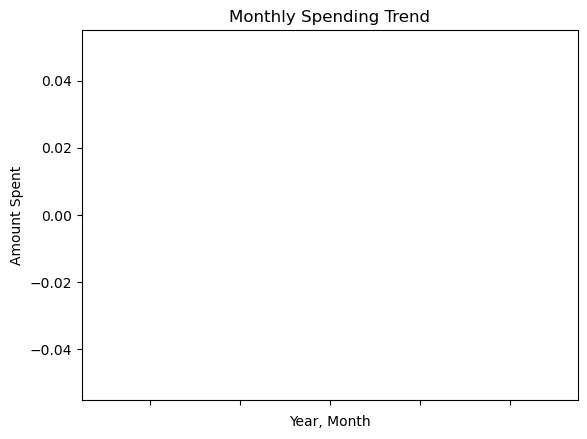

In [4]:
monthly_spending.plot(kind="line")
plt.title("Monthly Spending Trend")
plt.xlabel("Year, Month")
plt.ylabel("Amount Spent")
plt.show()

In [5]:
category_totals = (
    df[df["Type"] == "Expense"]
    .groupby("Category")["Amount"]
    .sum()
    .abs()
    .sort_values(ascending=False)
)

category_totals

Series([], Name: Amount, dtype: float64)

IndexError: index 0 is out of bounds for axis 0 with size 0

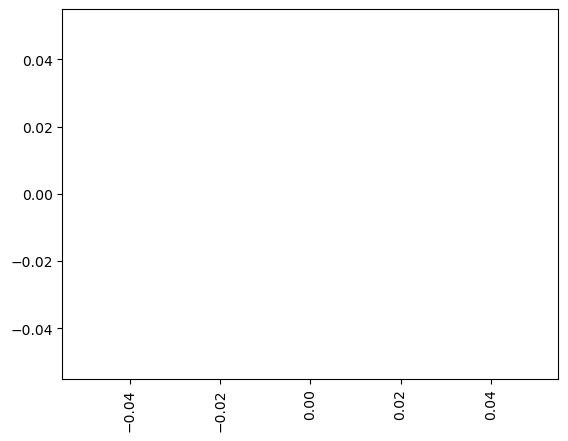

In [6]:
category_totals.plot(kind="bar")
plt.title("Spending by Category")
plt.xlabel("Category")
plt.ylabel("Total Spending")
plt.xticks(rotation=45)
plt.show()

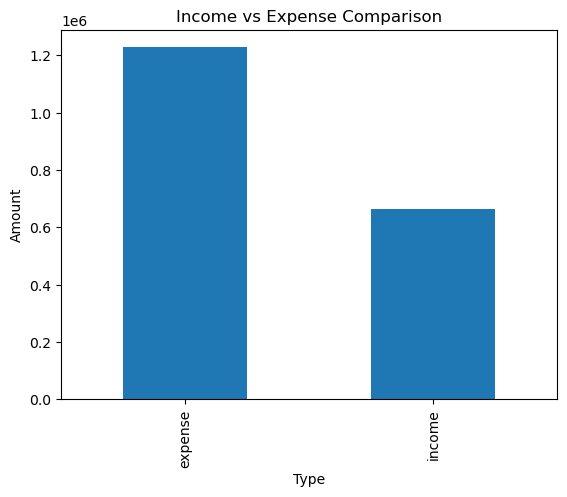

In [7]:
income_vs_expense = df.groupby("Type")["Amount"].sum()

income_vs_expense.plot(kind="bar")
plt.title("Income vs Expense Comparison")
plt.ylabel("Amount")
plt.show()